# Movimento Browniano (Brownian Motion)

$ X(0) = X_{0} $ <br>
$ X(t+dt) = X(t) + N(0, (delta)^{2}dt;t, t+dt) $

onde $N(a, b, t_{1}, t_{2})$ é uma variável aleatória normalmente distribuída com média $a$ e variância $b$. Os parâmetros $t_{1}$ e $t_{2}$ deixam evidente a independência estatística de $N$ em diferentes intervalos de tempo.

In [10]:
from scipy.stats import norm
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# process parameters
delta = 0.25
dt = 0.1

# Initial Conditional
x = 0

# Number of iterations to compute
n = 10

for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

0.00892066807834
0.00458358001678
0.00625706814327
0.00812743526328
0.00146130576685
0.0053125172698
0.00764525793828
0.00931804992012
0.00800676980035
0.0123544512683


O problema com código acima é que ele é lento. Se quisermos calcular uma grande quantidade de iterações, há como fazer melhor.<br>
Importante notar que o cálculo é uma soma cumulativa das amostras de uma distribuição Normal. Dessa forma, podemos gerar todas as amostras de uma só vez usando scipy.stats.norm.rvs() e, usando numpy.cumsum, para fazer a soma cumulativa.

In [9]:
def brownian(x0, n, dt, delta, out=None):
    """
        Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.
    """
    x0 = np.asarray(x0)
    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    
    #If 'out' was not given, create an output array
    if out is None:
        out = np.empty(r.shape)
    
    # This computes the Brownian Motion by forming the cumulative sum of 
    # the random samples.
    np.cumsum(r, axis=-1, out=out)
    
    # Add the initial condition
    out += np.expand_dims(x0, axis=-1)
    
    return ou

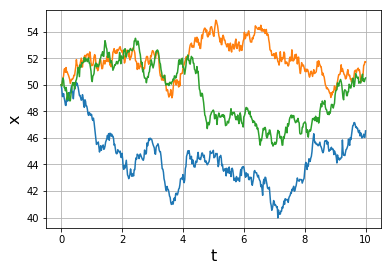

In [15]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 3
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])
t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plt.plot(t, x[k])
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.grid(True)
plt.show()

Nota: Vamos mostrar como gerar amostras aleatórias de distribuições multivariadas usando o scipy, mas a biblioteca numpy possui a função 'numpy.random.multivariate_normal' com o mesmo fim.

Para se gerar amostras aleatórias normalmente correlacionadas poderíamos primeiro gerar amostras não correlacionadas e então multiplica-las por uma matriz C, tal que $ CC ^{T} = R$ em que $R$ é a matriz de covariância desejada. C pode ser criada, por exemplo, usando a decomposição de Cholesky de R ou pelos autovalores e autovetores de R.


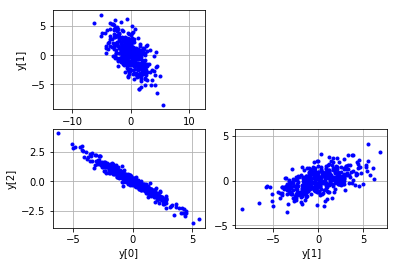

In [17]:
"""Example of generating correlated normally distributed random samples."""

from scipy.linalg import eigh, cholesky


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
plt.subplot(2,2,1)
plt.plot(y[0], y[1], 'b.')
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(y[0], y[2], 'b.')
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y[1], y[2], 'b.')
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

# Decomposição de Cholesky

Em álgebra linear, a decomposição de Cholesky ou fatoração de Cholesky é uma decomposição de uma matriz hermitiana e positiva definida no produto de uma matriz triangular inferior e sua matriz adjunta, o que é útil por exemplo para soluções numéricas eficientes e simulações de Monte Carlo. Foi descoberta por André-Louis Cholesky para matrizes reais. Quando é aplicável, a decomposição de Cholesky é aproximadamente duas vezes mais eficiente que a decomposição LU para resolver sistemas de equações lineares.

$ A = CC^{T} $

onde $A$ é a matriz Hermitiana positiva definida, $C$ é uma matriz triangular inferior com entradas diagonais positivas e reais, $C^{T}$ é a matriz conjulgada transposta de $C$.

Para que uma matriz A seja Hermitiana positiva definida é preciso que as determinantes dos triangulos menores sejam positivos e que ela seja simétrica ($A^{T} = A$)

In [39]:
A = np.mat([
           [  4,  12, -16], 
           [ 12,  37, -43],
           [-16, -43,  98]])
print(A == A.T)
print(np.linalg.det(A))
print(np.linalg.det(A[:2,:2]))
print((A[0,0]))
C = cholesky(A, lower=True)
C

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
36.0
4.0
4


array([[ 2.,  0.,  0.],
       [ 6.,  1.,  0.],
       [-8.,  5.,  3.]])

36.0